In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
from io import StringIO
from keras.datasets import mnist
from sklearn import metrics
import pandas as pd
# Plus the models you are using

from sklearn.neural_network import MLPClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense

## Task 1
 1. Load the mnist dataset (see below)
 * Load the dataset and plot the first 5 images
 * The data is already slpit into training and testing parts
 * Teach two fully connected neural networks with the training set using two different systems
 * One hidden layer with 50-100 neurons is in general enough to obtain pritty good result.
 * Use cross entropy as loss function
 * Test your data
 * Create a confusion matrix. $C_{ij}$ is the count for detecting an image with number $i$ as number $j$
 * Plot the confusion matrix

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
len(train_X)

60000

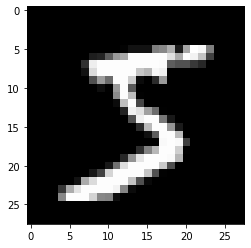

5


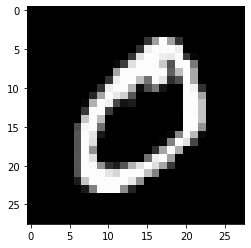

0


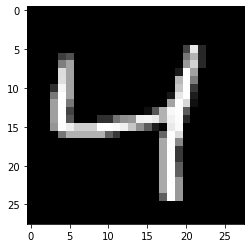

4


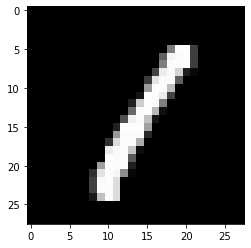

1


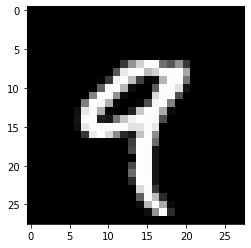

9


In [ ]:
for i in range(5):
    plt.imshow(train_X[i],cmap='gray')
    plt.show()
    print(train_y[i])

In [ ]:
cm = metrics.confusion_matrix([0,0,0,0,1,1,1,1],[0,1,0,0,1,0,1,0])
print(cm)

[[3 1]
 [2 2]]


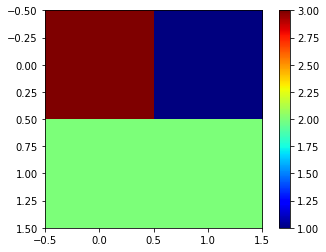

In [ ]:
plt.imshow(cm,cmap='jet')
plt.colorbar()

### Scykit Learn

In [ ]:
imgs = train_X.reshape((60000, -1))
imgs.shape

(60000, 784)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(75), max_iter=100, alpha=1e-4,
                    solver='lbfgs', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1,activation='logistic')

mlp.fit(imgs, train_y)
print("Training set score: %f" % mlp.score(imgs, train_y))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training set score: 0.949867


In [ ]:
test_X.shape

(10000, 28, 28)

In [ ]:
test_imgs = test_X.reshape((10000, -1))

predictions = mlp.predict(test_imgs)

In [ ]:
cm = metrics.confusion_matrix(predictions,test_y)
print(cm)

[[ 962    0   11    0    1   11    9    2    5    5]
 [   0 1116    2    1    1    2    2    8    2    4]
 [   2    2  957    9    5    5    5   20    9    2]
 [   2    2   10  933    0   31    1    6   23   10]
 [   0    0    9    1  921    4    9    6   11   42]
 [   6    1    4   25    0  810   12    1   17   15]
 [   5    2    9    1   10    8  914    0   11    1]
 [   1    3   11   12    7    0    2  961    8   15]
 [   1    9   17   23    6   15    4    3  883    9]
 [   1    0    2    5   31    6    0   21    5  906]]


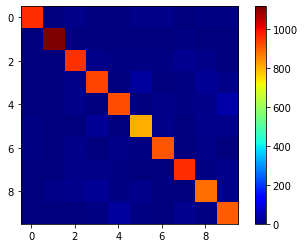

In [ ]:
plt.imshow(cm,cmap='jet')
plt.colorbar()

### Keras

In [ ]:
imgs = train_X.reshape((60000, -1))
imgs.shape

(60000, 784)

In [ ]:
model = Sequential()
model.add(Dense(75, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
new_train_y = np.zeros((60000, 10))

for i in range(len(new_train_y)):
  new_train_y[i][train_y[i]] = 1

new_train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
model.fit(imgs, new_train_y, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0602 - accuracy: 0.9133
Epoch 2/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0527 - accuracy: 0.9232
Epoch 3/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0500 - accuracy: 0.9263
Epoch 4/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0477 - accuracy: 0.9292
Epoch 5/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0473 - accuracy: 0.9286
Epoch 6/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0467 - accuracy: 0.9308
Epoch 7/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0454 - accuracy: 0.9318
Epoch 8/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0446 - accuracy: 0.9337
Epoch 9/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0442 - accuracy: 0.9345
Epoch 10/10
6000/6000 [==============================] - 14s 2ms/step - l

In [ ]:
test_imgs = test_X.reshape((10000, -1))

predictions = model.predict(test_imgs)
predictions[1000]

array([1.0198228e-18, 5.9428995e-09, 2.0360947e-04, 8.3583632e-07,
       9.4008446e-04, 5.8614016e-03, 5.5469935e-09, 1.4397502e-04,
       4.7172231e-05, 9.9933428e-01], dtype=float32)

In [ ]:
predictions = predictions.argmax(axis = 1)

In [ ]:
cm = metrics.confusion_matrix(predictions,test_y)
print(cm)

[[ 949    0    2    2    1    2    7    1    3    3]
 [   0 1120    2    0    2    1    3    5    4    7]
 [   1    3  917    7    3    2    1   16    3    0]
 [   0    1    7  945    1   33    1    3    4    5]
 [   0    0    4    0  880    1    5    5    5   16]
 [   0    2    1    3    0  775    5    0    7    3]
 [   1    1    3    0   14    7  905    0    1    0]
 [   2    0    9    2    1    3    0  934    2    6]
 [  27    8   85   43   40   63   31   34  939   46]
 [   0    0    2    8   40    5    0   30    6  923]]


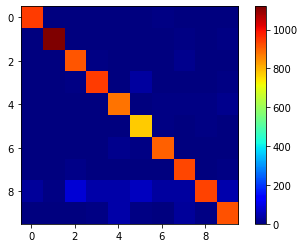

In [ ]:
plt.imshow(cm,cmap='jet')
plt.colorbar()

## Task 2 Red Wine challenge
 1. The one with the best result will earn a bottle of red wine (Jekl: Portugeiser, 3.5 on Vivino)
 2. Download the red wine dataset <a href="http://www.phy.bme.hu/~torok/wine_red.csv">http://www.phy.bme.hu/~torok/wine_red.csv</a>
 3. Train any network you want, to predict the quality, you may consider using 'mean_squared_error' loss function or MLPRegressor as the quality is continuous
 4. Test the results using <a href="http://www.phy.bme.hu/~torok/qqq_wine_red.csv">http://www.phy.bme.hu/~torok/qqq_wine_red.csv</a>
 5. I ask you not to cheat :-)
 6. Last year the winner had less than 60% success rate from the test. Success means deviation less than 0.5 in the quality


In [ ]:
df = pd.read_csv("wine_red.csv",sep=';')

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1115,5.4,0.74,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1116,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1117,6.2,0.60,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1118,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [ ]:
df.to_numpy()

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       [11.2 ,  0.28,  0.56, ...,  0.58,  9.8 ,  6.  ],
       ...,
       [ 6.2 ,  0.6 ,  0.08, ...,  0.58, 10.5 ,  5.  ],
       [ 5.9 ,  0.55,  0.1 , ...,  0.76, 11.2 ,  6.  ],
       [ 6.  ,  0.31,  0.47, ...,  0.66, 11.  ,  6.  ]])

In [ ]:
#note that last column is the quality which is the target